In [1]:
import cv2
import mediapipe as mp
import numpy as np
from IPython.display import clear_output, Image, display
import time



In [2]:

class HandTracker:
    def __init__(self):
        # Initialize MediaPipe Hand components
        self.mp_hands = mp.solutions.hands
        self.hands = self.mp_hands.Hands(
            static_image_mode=False,
            max_num_hands=2,
            min_detection_confidence=0.7,
            min_tracking_confidence=0.5
        )
        self.mp_draw = mp.solutions.drawing_utils
        self.drawing_styles = mp.solutions.drawing_styles
    
    def process_frame(self, frame):
        # Convert BGR to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Process the frame and detect hands
        results = self.hands.process(rgb_frame)
        
        # Draw hand landmarks if detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks
                self.mp_draw.draw_landmarks(
                    frame,
                    hand_landmarks,
                    self.mp_hands.HAND_CONNECTIONS,
                    self.drawing_styles.get_default_hand_landmarks_style(),
                    self.drawing_styles.get_default_hand_connections_style()
                )
                
        return frame, results


In [3]:
def start_tracking():
    # Initialize camera
    cap = cv2.VideoCapture(0)
    tracker = HandTracker()
    
    try:
        while True:
            # Read frame from camera
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame")
                break
                
            # Process the frame
            frame, results = tracker.process_frame(frame)
            
            # Convert frame to RGB for display
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            # Display the frame
            clear_output(wait=True)
            display(Image(data=cv2.imencode('.jpg', rgb_frame)[1].tobytes()))
            
            # Add a small delay to prevent overwhelming the notebook
            time.sleep(0.1)
            
    except KeyboardInterrupt:
        print("\nTracking stopped by user")
    finally:
        cap.release()
        cv2.destroyAllWindows()

# Function to get hand landmark coordinates
def get_landmark_coordinates(results):
    if results.multi_hand_landmarks:
        coordinates = []
        for hand_landmarks in results.multi_hand_landmarks:
            hand_points = []
            for landmark in hand_landmarks.landmark:
                hand_points.append({
                    'x': landmark.x,
                    'y': landmark.y,
                    'z': landmark.z
                })
            coordinates.append(hand_points)
        return coordinates
    return None

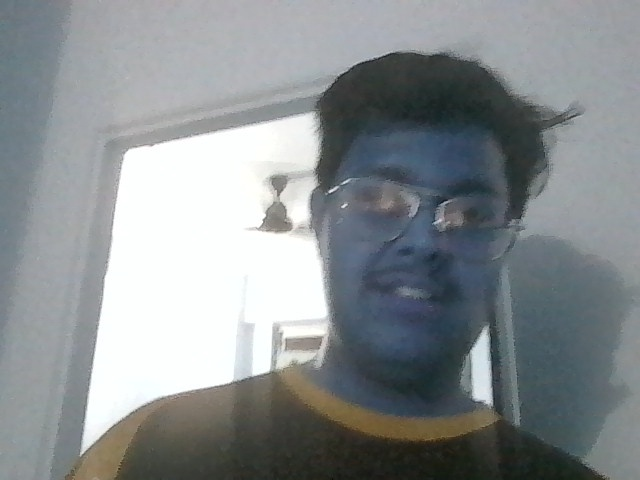


Tracking stopped by user


In [4]:
start_tracking()